In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

In [25]:
import pandas as pd
df = pd.read_excel("data/league_history/actual_draft_history_cleaned.xlsx")

# Replace 'josh' with 'joshua' in the 'team' column
df['team'] = df['team'].replace('joshua', 'josh')

# Save the updated DataFrame to a new CSV file
# 'index=False' prevents pandas from writing the DataFrame index as a column
df.to_csv("/workspaces/legacy_league/data/league_history/actual_draft_history_cleaned_corrected.csv", index=False)

print("/workspaces/legacy_league/data/league_history/actual_draft_history_cleaned_corrected.csv")
# Display the first few rows to confirm it loaded correctly
print(df.head(10))


/workspaces/legacy_league/data/league_history/actual_draft_history_cleaned_corrected.csv
   season     team  pick  reg  playoff  league_size
0    2024      Ant     1    7        6           14
1    2024     Adam     2    8       12           14
2    2024    Tyler     3    4        4           14
3    2024     Nate     4    1        1           14
4    2024    Peete     5    5        7           14
5    2024      Vic     6   11       11           14
6    2024     Josh     7    3        3           14
7    2024  Rashide     8   12        8           14
8    2024      Mac     9   10       10           14
9    2024    Jesus    10    9        9           14


Names should be fixed now..

/tmp/ipykernel_112546/1510372975.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




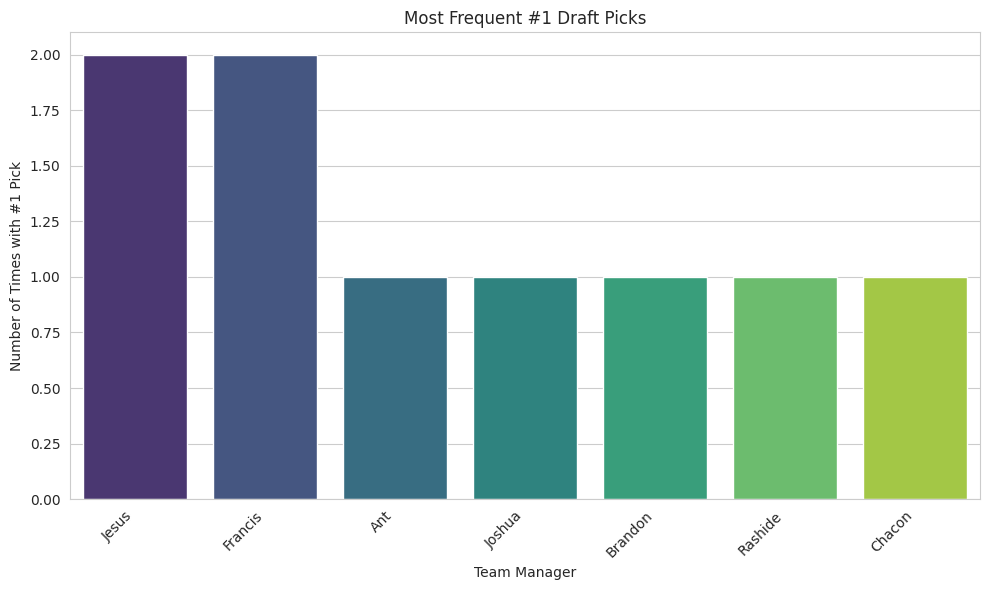

In [26]:
first_picks = df[df['pick'] == 1]

# Count how many times each manager had the #1 pick
top_pick_counts = first_picks['team'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pick_counts.index, y=top_pick_counts.values, palette='viridis')
plt.title('Most Frequent #1 Draft Picks')
plt.xlabel('Team Manager')
plt.ylabel('Number of Times with #1 Pick')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:

first_picks = df[df['pick'] == 1]

# Group by team and see where they finished
outcomes = first_picks.groupby('team')['playoff'].value_counts().unstack(fill_value=0)

print(outcomes)


playoff  1   2   4   6   8   10  11
team                               
Ant       0   0   0   1   0   0   0
Brandon   0   1   0   0   0   0   0
Chacon    0   0   1   0   0   0   0
Francis   1   1   0   0   0   0   0
Jesus     0   0   0   0   0   1   1
Joshua    0   0   0   0   1   0   0
Rashide   0   0   0   0   1   0   0


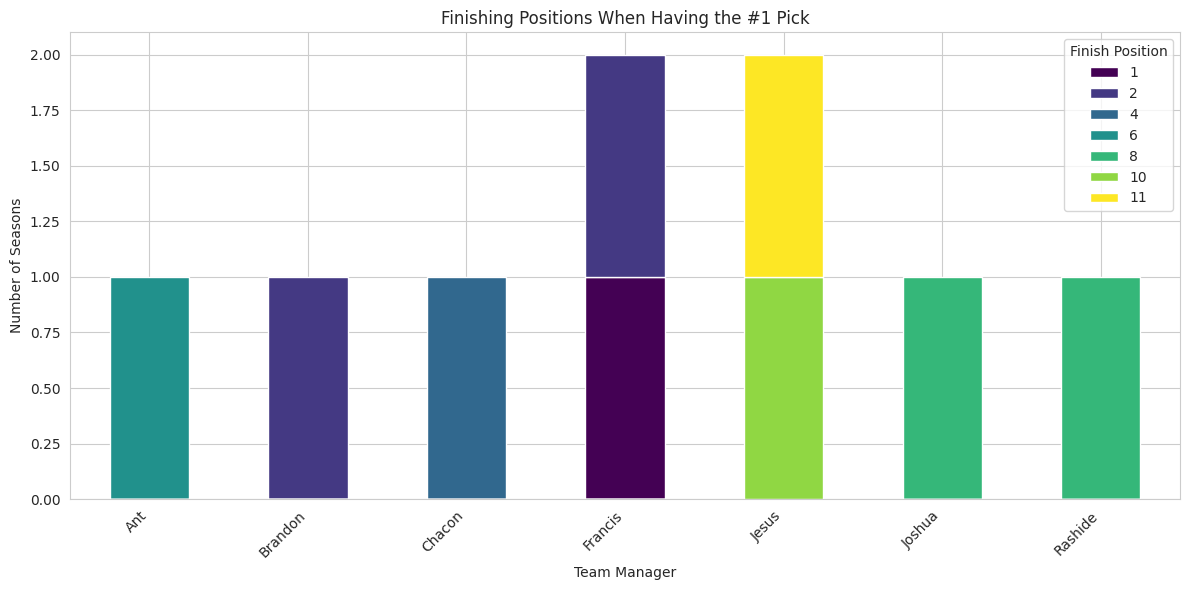

In [28]:
outcomes.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

plt.title('Finishing Positions When Having the #1 Pick')
plt.xlabel('Team Manager')
plt.ylabel('Number of Seasons')
plt.legend(title='Finish Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

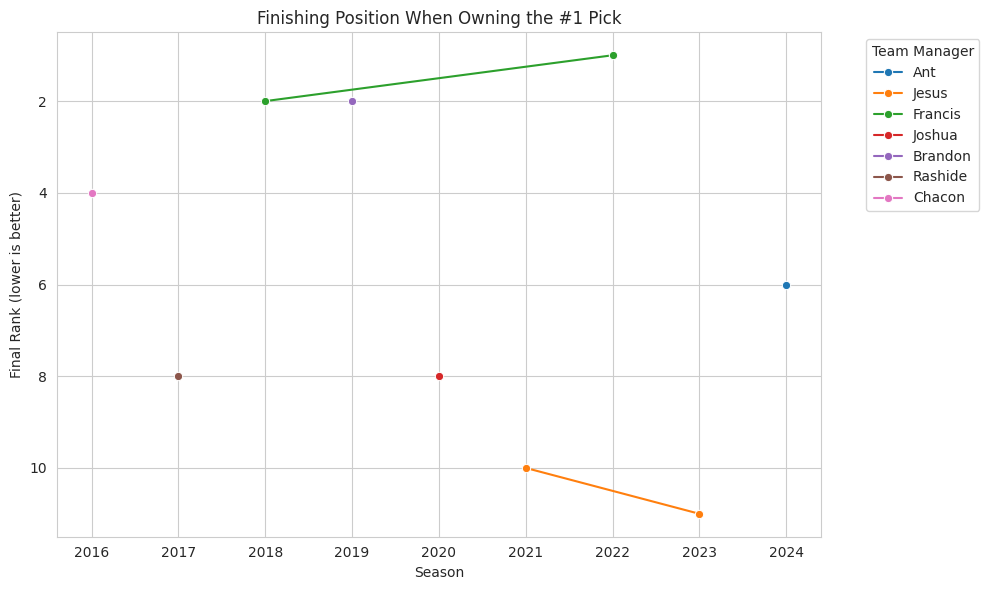

In [29]:
# Filter for #1 picks
first_picks = df[df['pick'] == 1]

plt.figure(figsize=(10,6))

# Plot each team's outcomes over seasons
sns.lineplot(
    data=first_picks,
    x='season',
    y='playoff',
    hue='team',
    marker='o'
)

plt.title('Finishing Position When Owning the #1 Pick')
plt.xlabel('Season')
plt.ylabel('Final Rank (lower is better)')
plt.gca().invert_yaxis()  # So 1st place is at the top
plt.legend(title='Team Manager', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_112546/2606789667.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




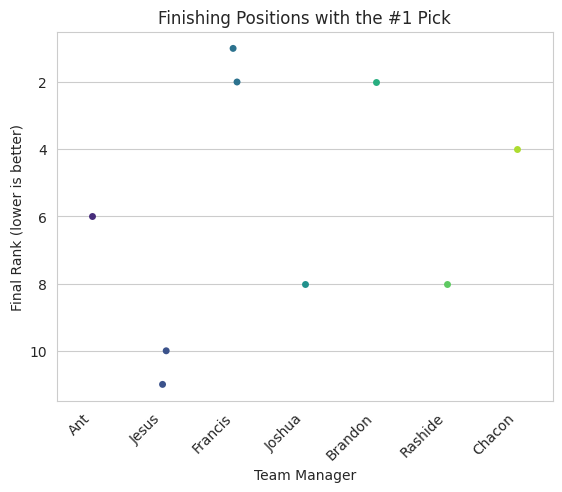

In [30]:
sns.stripplot(
    data=first_picks,
    x='team',
    y='playoff',
    jitter=True,
    palette='viridis'
)
plt.gca().invert_yaxis()
plt.title('Finishing Positions with the #1 Pick')
plt.xlabel('Team Manager')
plt.ylabel('Final Rank (lower is better)')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipykernel_112546/245619851.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




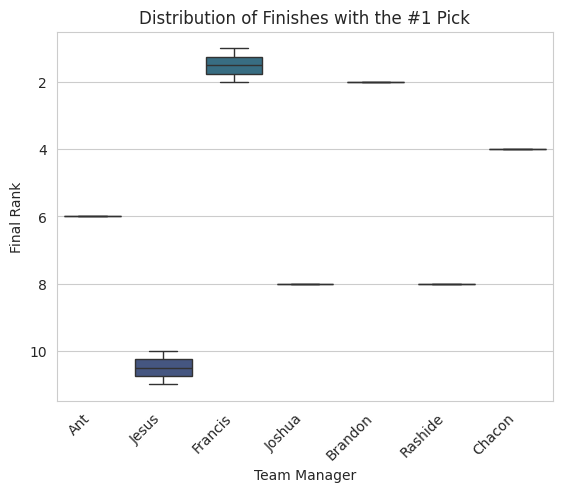

In [31]:
sns.boxplot(
    data=first_picks,
    x='team',
    y='playoff',
    palette='viridis'
)
plt.gca().invert_yaxis()
plt.title('Distribution of Finishes with the #1 Pick')
plt.xlabel('Team Manager')
plt.ylabel('Final Rank')
plt.xticks(rotation=45, ha='right')
plt.show()


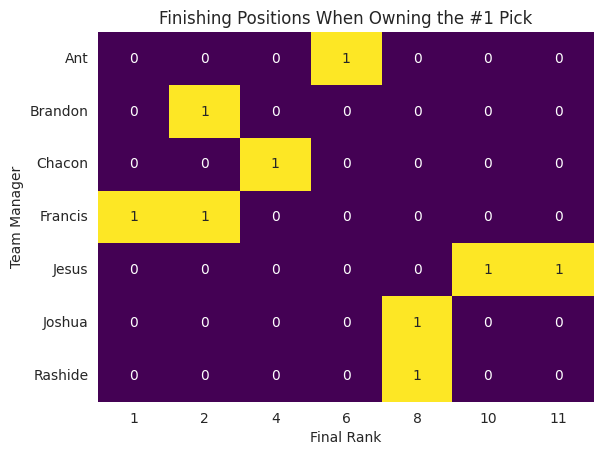

In [32]:
outcomes = first_picks.groupby(['team','playoff']).size().unstack(fill_value=0)

sns.heatmap(outcomes, annot=True, cmap='viridis', cbar=False)
plt.title('Finishing Positions When Owning the #1 Pick')
plt.ylabel('Team Manager')
plt.xlabel('Final Rank')
plt.show()


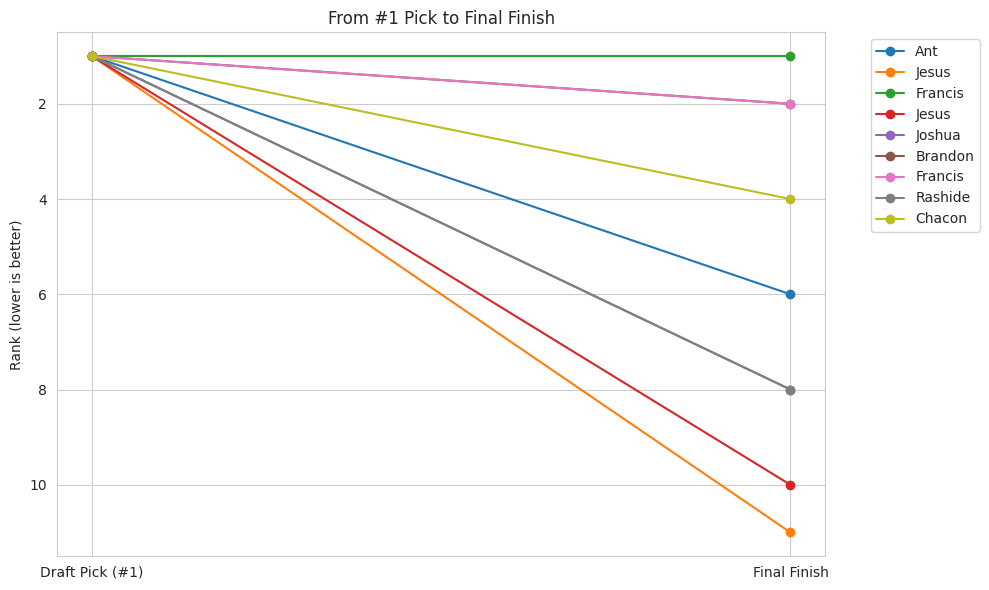

In [33]:
import matplotlib.pyplot as plt

# Each row: team, season, final finish when pick == 1
first_picks = df[df['pick'] == 1]

plt.figure(figsize=(10,6))

for _, row in first_picks.iterrows():
    plt.plot([0,1], [1, row['playoff']], marker='o', label=row['team'])

# Fix x-axis
plt.xticks([0,1], ['Draft Pick (#1)', 'Final Finish'])
plt.gca().invert_yaxis()  # so 1st place is at top

plt.title('From #1 Pick to Final Finish')
plt.ylabel('Rank (lower is better)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [34]:
!pip install plotly ipython -U nbformat

In [35]:
import plotly.graph_objects as go

# Count flows
flows = first_picks.groupby(['pick','playoff']).size().reset_index(name='count')

fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=['Number 1 Overall Pick'] + [f'Final Ranking = {f}' for f in flows['playoff'].unique()],
        pad=15, thickness=20
    ),
    link=dict(
        source=[0]*len(flows),
        target=[list(flows['playoff'].unique()).index(f) + 1 for f in flows['playoff']],
        value=flows['count']
    )
)])
fig.show()


In [36]:
import pandas as pd
import plotly.graph_objects as go

# Filter to #1 picks and make sure types are clean
first_picks = df[df['pick'] == 1].copy()
# rename/end_col if yours is 'finish' instead of 'playoff'
end_col = 'playoff'
first_picks[end_col] = first_picks[end_col].astype(int)

def details_block(d):
    # assumes you have 'season' and 'team' cols
    d = d.sort_values('season')
    lines = [f"{int(r['season'])} — {r['team']}" for _, r in d.iterrows()]
    return "<br>".join(lines)

# Aggregate: one row per final outcome, with count + formatted hover details
agg = (first_picks.groupby(end_col, as_index=False)
       .apply(lambda d: pd.Series({
           'count': len(d),
           'details': details_block(d)
       }))
       .reset_index(drop=True))

# Build node labels (source + each finish bucket)
finishes = sorted(agg[end_col].astype(int).tolist())
labels = ['Number 1 Overall Pick'] + [f'Final Ranking = {f}' for f in finishes]
idx = {lab: i for i, lab in enumerate(labels)}

sources = [idx['Number 1 Overall Pick']] * len(finishes)
targets = [idx[f'Final Ranking = {f}'] for f in finishes]
values  = agg['count'].tolist()
hovers  = [f"{v} season(s) ended at {f}<br><br>{det}"
           for v, f, det in zip(values, finishes, agg['details'])]

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        customdata=hovers,
        hovertemplate="%{customdata}<extra></extra>"
    )
)])
fig.update_layout(title_text="From #1 Pick → Final Result (with seasons/managers)", font_size=12)
fig.show()


/tmp/ipykernel_112546/4100680498.py:18: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [37]:
import plotly.graph_objects as go

first_picks = df[df['pick'] == 1].copy()
end_col = 'playoff'
first_picks[end_col] = first_picks[end_col].astype(int)

teams = sorted(first_picks['team'].unique())
finishes = sorted(first_picks[end_col].unique())

labels = (['Number 1 Overall Pick'] +
          [f"Team: {t}" for t in teams] +
          [f"Final = {f}" for f in finishes])

idx = {lab: i for i, lab in enumerate(labels)}

# Links: Pick1 -> Team (count of #1-pick seasons per team)
pt = (first_picks.groupby('team').size().reset_index(name='count'))
src1 = [idx['Number 1 Overall Pick']] * len(pt)
tgt1 = [idx[f"Team: {t}"] for t in pt['team']]
val1 = pt['count'].tolist()

# Links: Team -> Final (counts per team/final)
tf = (first_picks.groupby(['team', end_col])
      .size().reset_index(name='count'))
src2 = [idx[f"Team: {t}"] for t in tf['team']]
tgt2 = [idx[f"Final = {f}"] for f in tf[end_col]]
val2 = tf['count'].tolist()

# Optional rich hovers on team->final links
# Build season list per (team, finish)
details_map = (first_picks
               .groupby(['team', end_col])
               .apply(lambda d: "<br>".join(
                   f"{int(r['season'])}" for _, r in d.sort_values('season').iterrows()))
               .to_dict())
hovers2 = [f"{team} → Final {fin}<br>{details_map.get((team, fin), '')}"
           for team, fin in zip(tf['team'], tf[end_col])]

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(
        source=src1 + src2,
        target=tgt1 + tgt2,
        value=val1 + val2,
        # only add hovertext for the second stage; empty for first stage
        customdata=([""] * len(src1)) + hovers2,
        hovertemplate="%{customdata}<extra></extra>"
    )
)])
fig.update_layout(title_text="Pick #1 → Team → Final", font_size=12)
fig.show()


/tmp/ipykernel_112546/2502705043.py:33: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [38]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# --- Data prep ---
first_picks = df[df['pick'] == 1].copy()

end_col = 'playoff'          # or 'finish'
label_source = 'Number 1 Overall Pick'

# make sure finish is int for sorting
first_picks[end_col] = first_picks[end_col].astype(int)

# Aggregate counts per final outcome + build rich hover details
def details_block(d):
    d = d.sort_values('season')
    return "<br>".join(f"{int(r['season'])} — {r['team']}" for _, r in d.iterrows())

agg = (first_picks.groupby(end_col, as_index=False)
       .apply(lambda d: pd.Series({'count': len(d), 'details': details_block(d)}))
       .reset_index(drop=True))

# Sorted finishes so 1 is at the top
finishes = sorted(agg[end_col].tolist())

# --- Nodes ---
labels = [label_source] + [f'Final Ranking = {f}' for f in finishes]

# Force positions: x in [0..1], y in [0..1] (0 = top)
x = [0.0] + [1.0] * len(finishes)

# spread destinations vertically in numeric order
y_dest = np.linspace(0.05, 0.95, len(finishes))  # tweak margins as needed
y = [0.5] + list(y_dest)  # put the source mid-column

# --- Links (Pick 1 -> Final) ---
idx = {lab: i for i, lab in enumerate(labels)}

sources = []
targets = []
values  = []
hovers  = []

for f, ytxt in zip(finishes, y_dest):
    sources.append(idx[label_source])
    targets.append(idx[f'Final Ranking = {f}'])
    count  = int(agg.loc[agg[end_col] == f, 'count'])
    values.append(count)
    detail = agg.loc[agg[end_col] == f, 'details'].values[0]
    hovers.append(f"{count} season(s) ended at {f}<br><br>{detail}")

fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=labels,
        pad=15,
        thickness=20,
        x=x,   # <- fixed column placement
        y=y,   # <- fixed vertical order (1 at top)
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        customdata=hovers,
        hovertemplate="%{customdata}<extra></extra>"
    )
)])
fig.update_layout(title_text="From #1 Pick → Final Result (ordered nodes)", font_size=12)
fig.show()


/tmp/ipykernel_112546/205937938.py:20: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_112546/205937938.py:47: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [39]:
# Teams in the middle (alphabetical), finals on the right (numeric)
teams = sorted(first_picks['team'].unique())

labels = (
    [label_source] +
    [f"Team: {t}" for t in teams] +
    [f"Final Ranking = {f}" for f in finishes]
)
idx = {lab: i for i, lab in enumerate(labels)}

# positions: left (0.0) | middle (0.5) | right (1.0)
x = ([0.0] +
     [0.5] * len(teams) +
     [1.0] * len(finishes))

# evenly space teams, and finals in numeric order
y_teams = np.linspace(0.05, 0.95, len(teams)) if teams else []
y_fins  = np.linspace(0.05, 0.95, len(finishes))
y = [0.5] + list(y_teams) + list(y_fins)

# Pick1 -> Team counts
pt = first_picks.groupby('team').size().reset_index(name='count')
src1 = [idx[label_source]] * len(pt)
tgt1 = [idx[f"Team: {t}"] for t in pt['team']]
val1 = pt['count'].tolist()

# Team -> Final counts + hover with seasons
tf = first_picks.groupby(['team', end_col]).size().reset_index(name='count')
src2 = [idx[f"Team: {t}"] for t in tf['team']]
tgt2 = [idx[f"Final Ranking = {f}"] for f in tf[end_col]]
val2 = tf['count'].tolist()

details_map = (first_picks.groupby(['team', end_col])
               .apply(lambda d: "<br>".join(f"{int(r['season'])}" for _, r in d.sort_values('season').iterrows()))
               .to_dict())
hovers2 = [f"{team} → Final {fin}<br>{details_map.get((team, fin), '')}"
           for team, fin in zip(tf['team'], tf[end_col])]

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20, x=x, y=y),
    link=dict(
        source=src1 + src2,
        target=tgt1 + tgt2,
        value=val1 + val2,
        customdata=([""] * len(src1)) + hovers2,
        hovertemplate="%{customdata}<extra></extra>"
    )
)])
fig.update_layout(title_text="Pick #1 → Team → Final (ordered nodes)", font_size=12)
fig.show()

print(outcomes)


/tmp/ipykernel_112546/1717174579.py:34: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



playoff  1   2   4   6   8   10  11
team                               
Ant       0   0   0   1   0   0   0
Brandon   0   1   0   0   0   0   0
Chacon    0   0   1   0   0   0   0
Francis   1   1   0   0   0   0   0
Jesus     0   0   0   0   0   1   1
Joshua    0   0   0   0   1   0   0
Rashide   0   0   0   0   1   0   0


/tmp/ipykernel_112546/3351927505.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




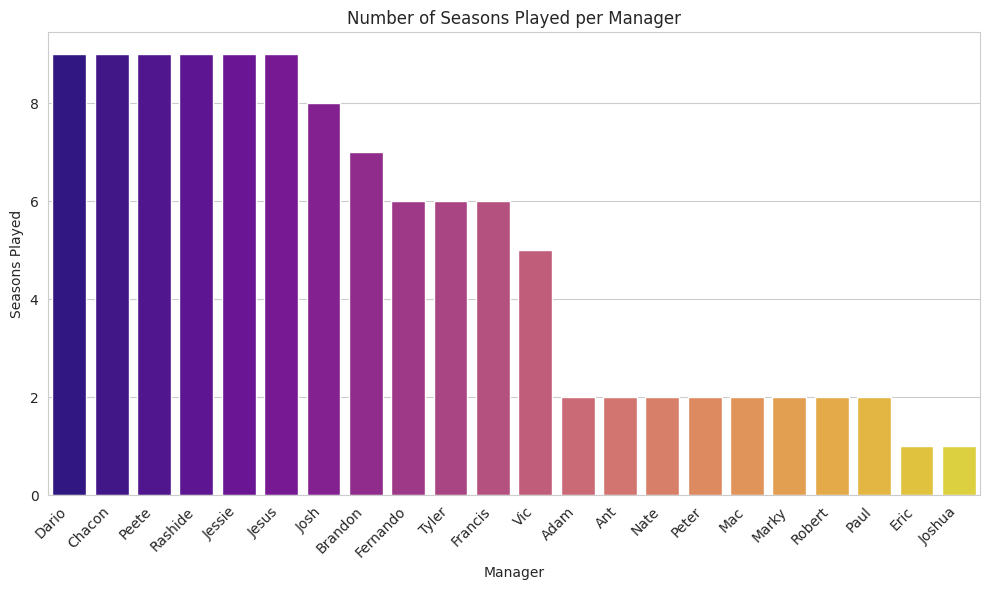

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load the corrected data
df = pd.read_csv("data/league_history/actual_draft_history_cleaned_corrected.csv")
# Count the number of unique years for each manager
seasons_played = df.groupby('team')['season'].nunique().sort_values(ascending=False)

# Create a bar chart to visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=seasons_played.index, y=seasons_played.values, palette='plasma')
plt.title('Number of Seasons Played per Manager')
plt.xlabel('Manager')
plt.ylabel('Seasons Played')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()